In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download('KO', start='2022-6-1')['Adj Close']
data

[*********************100%***********************]  1 of 1 completed


Date
2022-06-01    61.256718
2022-06-02    61.897743
2022-06-03    61.159592
2022-06-06    61.062469
2022-06-07    61.431541
                ...    
2023-06-06    60.310001
2023-06-07    60.220001
2023-06-08    60.369999
2023-06-09    60.470001
2023-06-12    60.209999
Name: Adj Close, Length: 259, dtype: float64

In [3]:
roll_max = data.rolling(min_periods=1, window=252).max()

In [4]:
daily_drawdown = data/roll_max - 1

In [5]:
max_daily_drawdown = daily_drawdown.rolling(min_periods=1, window=252).min()

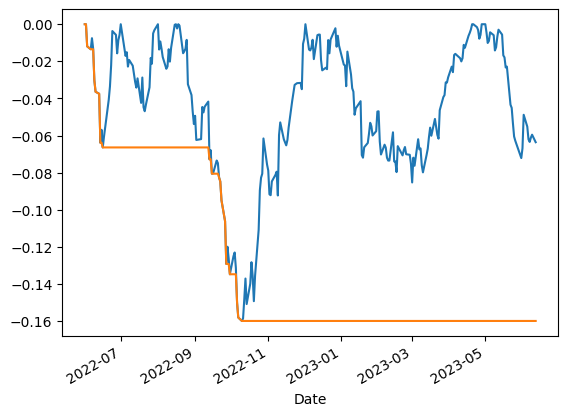

In [6]:
daily_drawdown.plot()
max_daily_drawdown.plot()
plt.show()

In [18]:
daily_drawdown.min()

-0.1599733388530613

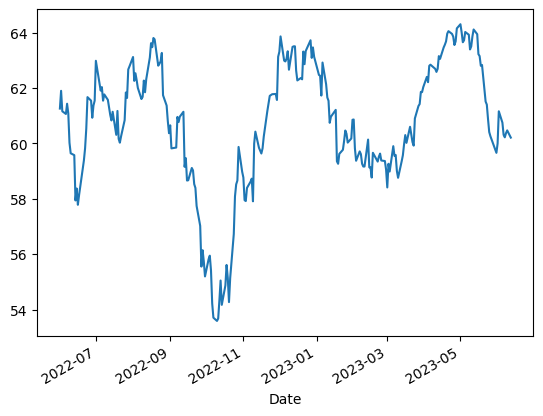

In [7]:
data.plot()
plt.show()

In [8]:
returns = data.pct_change()

In [11]:
Sharpe = (returns.mean()/returns.std())*np.sqrt(252)
Sharpe

-0.027068846649294445

In [12]:
dd = data / data.expanding(min_periods=1).max()

<Axes: xlabel='Date'>

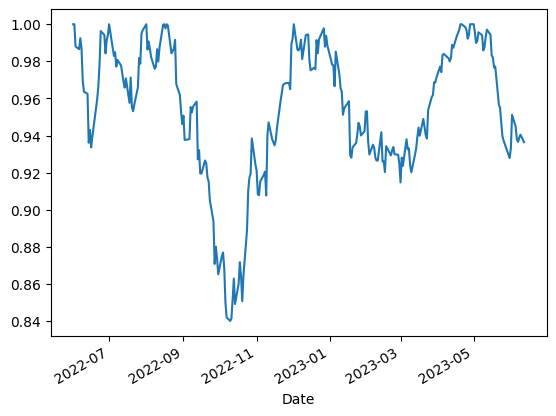

In [13]:
dd.plot()

In [14]:
dd.min()

0.8400266611469387

In [15]:
def duration(data):
    
    peak = data.expanding(min_periods=1).max()
    res = pd.DataFrame(index=data.index,columns=data.columns)
    
    for col in data.columns:
        for dt in data.index:
            
            if data.loc[dt,col] >= peak.loc[dt,col]:
                 res.loc[dt,col] = 0
    
            else:    
                res.loc[dt,col] = res.loc[:dt,col].iloc[-2] + 1

    return res

In [16]:
ddd = duration(data)

AttributeError: 'Series' object has no attribute 'columns'